<b>E23CSEU0055 - Arihant Gupta</b>
<br>
<b>Lab 10 - Time Series Analysis</b>
<br>
3rd Nov, 2025

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from arch import arch_model

Task 1 — Data Preparation
•	Load and plot the closing price time series.
•	Compute and plot daily returns = (Pₜ − Pₜ₋₁) / Pₜ₋₁ × 100.
•	Check stationarity of returns using the ADF test.


In [2]:
df = pd.read_csv("ADANIPORTS.csv")
# ndf = df[["Date", "Close", "Open"]].iloc[:100]
# ndf = ndf.set_index(ndf["Date"])
# ndf.drop("Date", axis=1,  inplace=True)
# ndf
# #df[["Open", "Close"]]

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df_close = df[['Close']].copy()

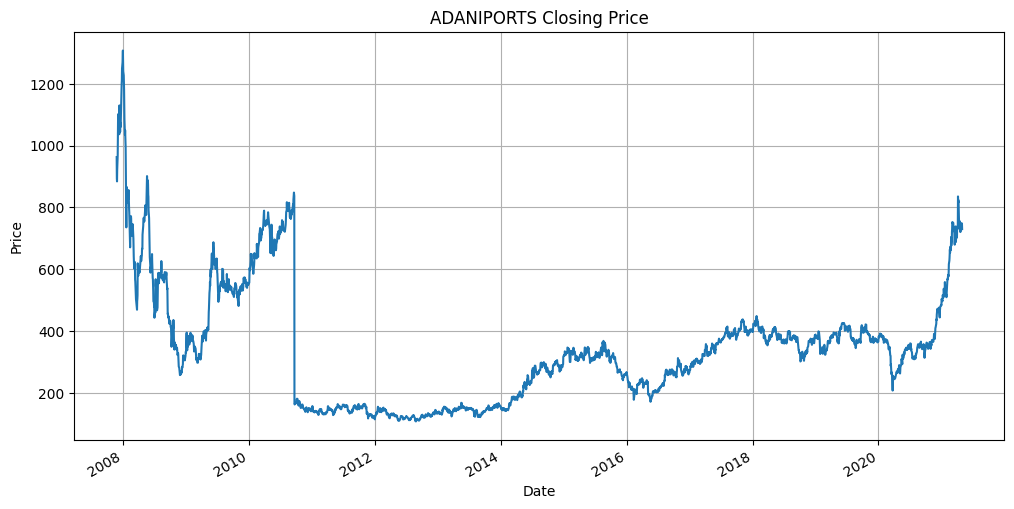

In [4]:
plt.figure(figsize=(12, 6))
df_close['Close'].plot(title='ADANIPORTS Closing Price')
plt.ylabel('Price')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [5]:
df_close['Returns'] = 100 * df_close['Close'].pct_change()
df_returns = df_close[['Returns']].dropna()

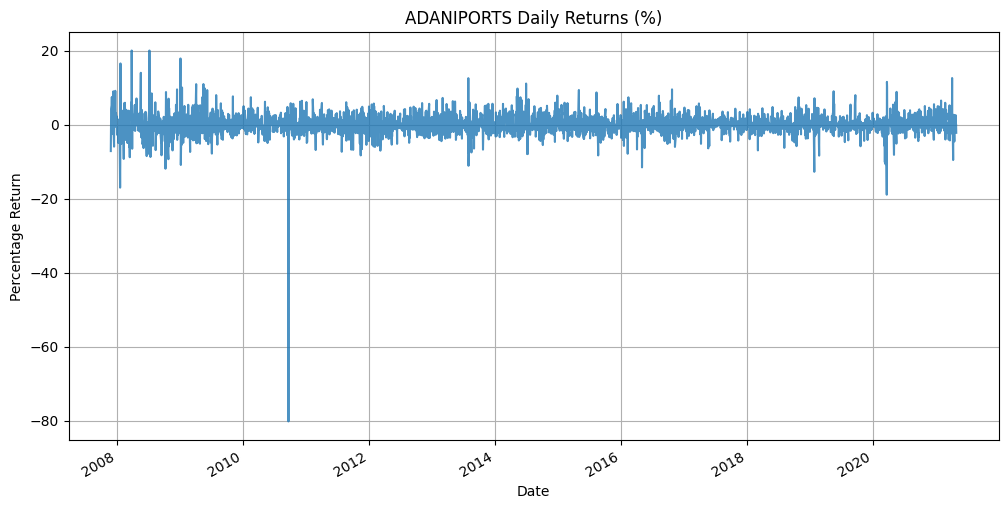

In [6]:
plt.figure(figsize=(12, 6))
df_returns['Returns'].plot(title='ADANIPORTS Daily Returns (%)', alpha=0.8)
plt.ylabel('Percentage Return')
plt.xlabel('Date')
plt.grid(True)
plt.show()

In [7]:
print("ADF Test")
adf_result = adfuller(df_returns['Returns'])
print(f'ADF: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

if adf_result[1] < 0.05:
    print("Result: The returns series is stationary (p-value < 0.05).")
else:
    print("Result: The returns series is non-stationary (p-value >= 0.05).")

ADF Test
ADF: -57.4565
p-value: 0.0000
Result: The returns series is stationary (p-value < 0.05).


Task 2 — ARCH Model
•	Fit an ARCH(1) model to the returns using arch_model() from the arch library.
•	Plot the conditional variance and comment on volatility clustering.
•	Analyze whether residuals show time-varying variance.



In [8]:
print("ARCH(1) Model")
model_arch = arch_model(df_returns['Returns'], vol='ARCH', p=1, q=1)
results = model_arch.fit(disp='off', show_warning=False)
residuals = results.resid
squared_residuals = residuals**2
arch_test = sm.stats.diagnostic.het_arch(squared_residuals)
print(f"{arch_test[1]:.4f} is the p-value, which is less than 0.05")

ARCH(1) Model
1.0000 is the p-value, which is less than 0.05


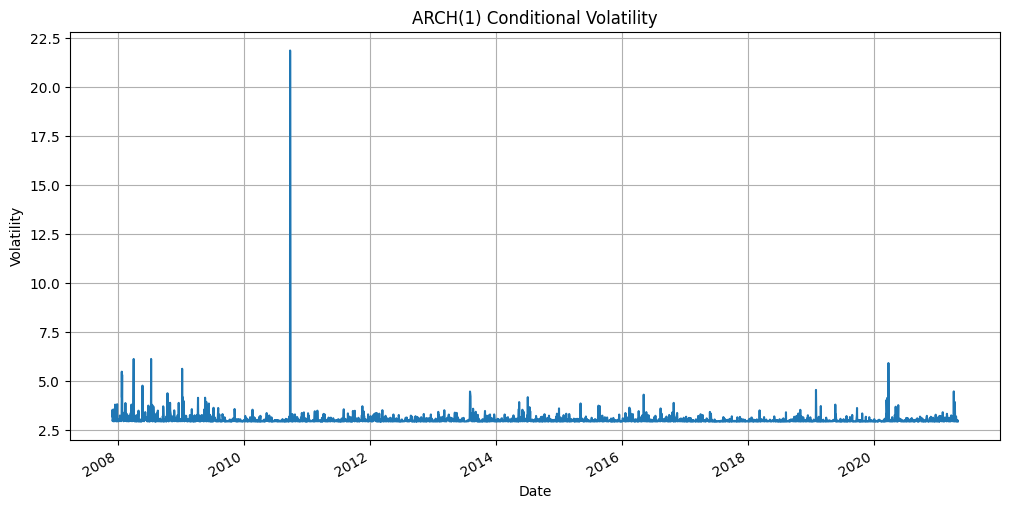

Plot for ARCH(1) Conditional Volatility has been displayed.


In [9]:
plt.figure(figsize=(12, 6))
results.conditional_volatility.plot(title='ARCH(1) Conditional Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.grid(True)
plt.show()
print("Plot for ARCH(1) Conditional Volatility has been displayed.")

Task 3 — GARCH Model
•	Fit a GARCH(1,1) model to the same returns data.
•	Compare the model’s fitted conditional variance with the ARCH model.
•	Forecast the next 10 days of volatility and interpret the results.


In [10]:
print("--- Task 3: GARCH(1,1) Model ---")

model_garch = arch_model(df_returns['Returns'], vol='Garch', p=1, q=1)
res_garch = model_garch.fit(update_freq=5, disp='off')

print(res_garch.summary())

--- Task 3: GARCH(1,1) Model ---
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8307.23
Distribution:                  Normal   AIC:                           16622.5
Method:            Maximum Likelihood   BIC:                           16646.9
                                        No. Observations:                 3321
Date:                Mon, Nov 03 2025   Df Residuals:                     3320
Time:                        16:49:36   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu             0.0211      0.105     

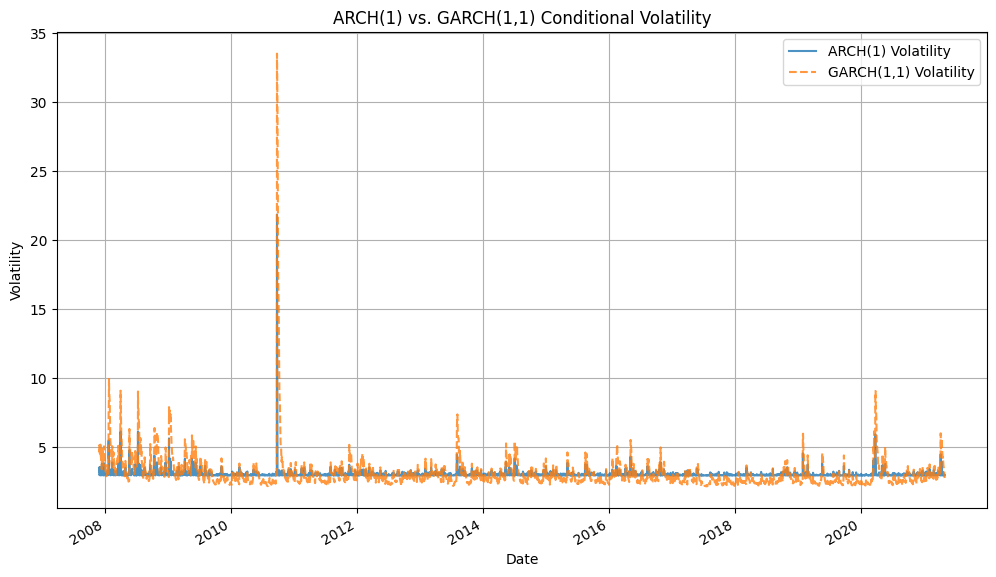

Plot comparing ARCH(1) and GARCH(1,1) volatility has been displayed.


In [11]:
plt.figure(figsize=(12, 7))
results.conditional_volatility.plot(label='ARCH(1) Volatility', alpha=0.8)
res_garch.conditional_volatility.plot(label='GARCH(1,1) Volatility', linestyle='--', alpha=0.8)
plt.title('ARCH(1) vs. GARCH(1,1) Conditional Volatility')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()
print("Plot comparing ARCH(1) and GARCH(1,1) volatility has been displayed.")

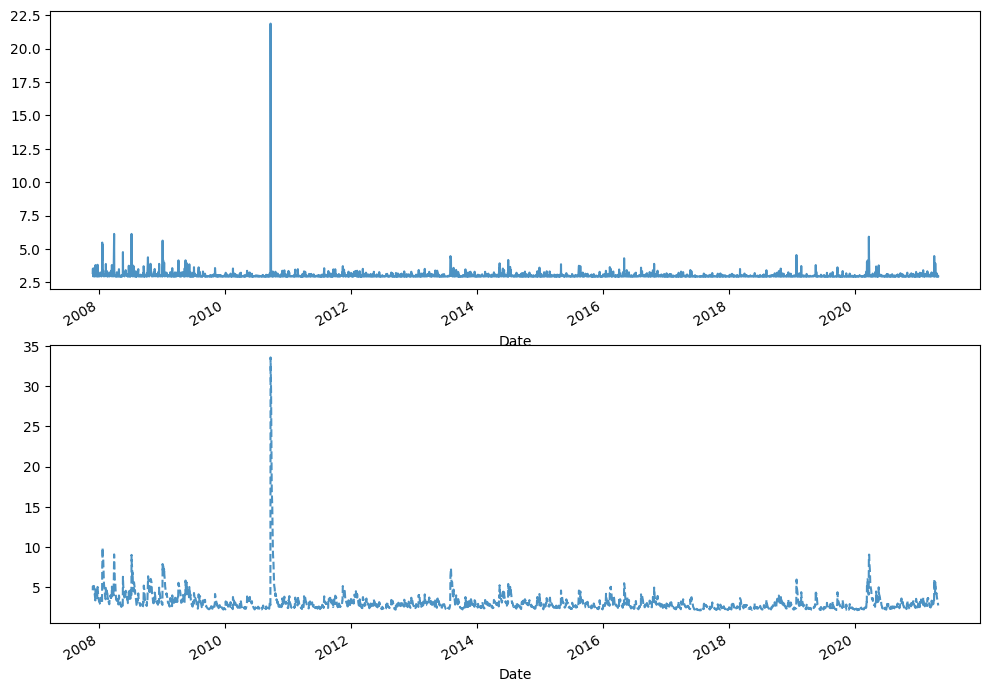

In [12]:
plt.figure(figsize=(12, 9))
plt.subplot(2,1,1)
results.conditional_volatility.plot(label='ARCH(1) Volatility', alpha=0.8)
plt.subplot(2,1,2)
res_garch.conditional_volatility.plot(label='GARCH(1,1) Volatility', linestyle='--', alpha=0.8)
plt.show()

Task 4 — Model Comparison
•	Compare AIC, BIC, and log-likelihood for ARCH and GARCH.


In [13]:
print("--- Task 4: Model Comparison ---")

print(f"ARCH(1) Model:")
print(f"  Log-Likelihood: {results.loglikelihood:.4f}")
print(f"  AIC: {results.aic:.4f}")
print(f"  BIC: {results.bic:.4f}")

print(f"\nGARCH(1,1) Model:")
print(f"  Log-Likelihood: {res_garch.loglikelihood:.4f}")
print(f"  AIC: {res_garch.aic:.4f}")
print(f"  BIC: {res_garch.bic:.4f}")

if res_garch.aic < results.aic and res_garch.bic < results.bic:
    print("\nResult: The GARCH(1,1) model is the better fit (Lower AIC/BIC and Higher Log-Likelihood).")
else:
    print("\nResult: The ARCH(1) model appears to be a better fit, which is unusual but possible.")

--- Task 4: Model Comparison ---
ARCH(1) Model:
  Log-Likelihood: -8380.9061
  AIC: 16767.8122
  BIC: 16786.1362

GARCH(1,1) Model:
  Log-Likelihood: -8307.2287
  AIC: 16622.4575
  BIC: 16646.8896

Result: The GARCH(1,1) model is the better fit (Lower AIC/BIC and Higher Log-Likelihood).
